<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Linear Classification</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# First of all..
Let's finish previous seminar super fast!

# Now, Linear classification

## Toy example

Generate data and apply logistic regression

In [23]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

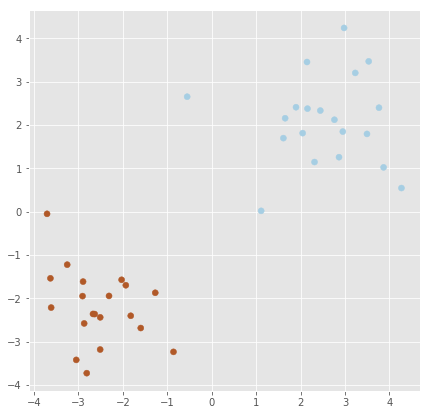

In [24]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [25]:
from sklearn.linear_model import LogisticRegression

Fit logistic regression and plot desicion boundary

In [33]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
print 'w_0 = %f' % model.intercept_
print 'w_1, w_2 = ', model.coef_

w_0 = -0.183954
w_1, w_2 =  [[-1.06097157 -1.00171289]]


In [61]:
w0 = model.intercept_
w1, w2 = model.coef_[0][0], model.coef_[0][1]
x1 = X[:, 0]
g = lambda x1: (-w1*x1-w0)/w2
x2 = g(x1)

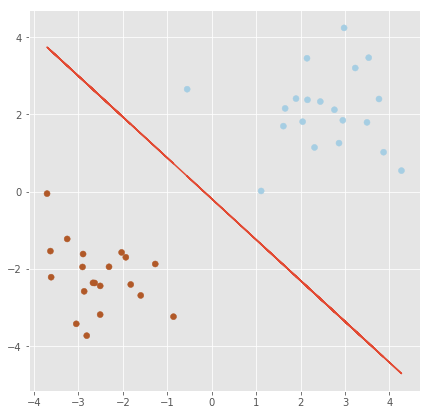

In [62]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
ax.plot(x1, x2)

In [63]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [64]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[9.98616528e-01, 1.38347180e-03],
       [9.99496019e-01, 5.03981209e-04],
       [9.95091160e-01, 4.90883960e-03],
       [9.94323473e-01, 5.67652674e-03],
       [9.90157090e-01, 9.84290974e-03],
       [9.97319087e-01, 2.68091305e-03],
       [9.94720579e-01, 5.27942062e-03],
       [9.94026880e-01, 5.97312006e-03],
       [9.96628393e-01, 3.37160720e-03],
       [9.77815343e-01, 2.21846572e-02]])

In [65]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

## How to make non-linear decision boundary?

Consider "bublic" dataset

In [66]:
from sklearn.datasets import make_circles

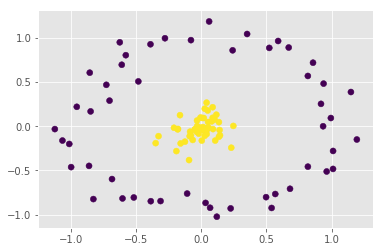

In [67]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

It is clear that classes cannot be separated via line.

So what we do is we should add nonliear feature to our model and then project decision boundary on to intial feature space

What feature should we add?


In [71]:
X_new = np.c_[X[:,0], X[:,1], X[:, 0]**2 + X[:, 1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [73]:
# Error rate
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

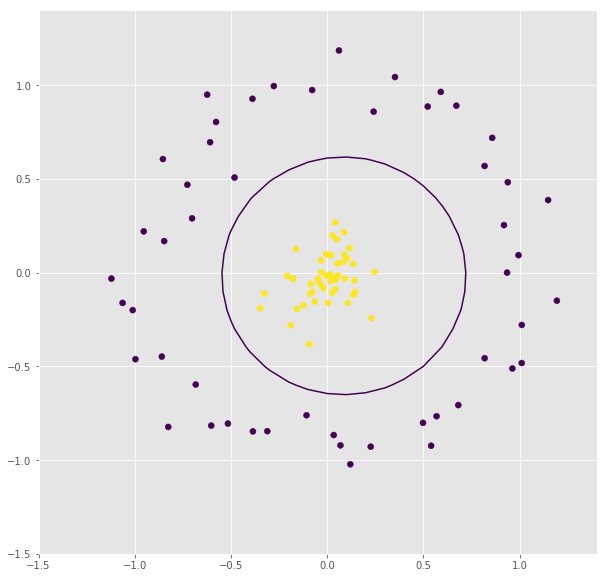

In [87]:
# Plot desicion border
plt.figure(figsize=(10, 10))
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx1**2 + xx0**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## Practical task - sentiment analysis

Load text files from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). There should be an archive with 3 datasets
* imdb.com
* amazon.com
* yelp.com

File format:
<Review>\t<class label>\n


### Task
1. Load files and set target features and review in different variables
2. Fit logistic regression to it. Consider text feature preprocessing
3. Output the most valuable coefficients and analyze them

In [88]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2018-02-16 12:52:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/zip]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  25.9KB/s    in 3.2s    

2018-02-16 12:52:36 (25.9 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [90]:
!unzip \*.zip

Archive:  sentiment labelled sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [91]:
!ls -al

total 228
drwxr-xr-x 7 sinopsys sinopsys   4096 Feb 16 12:52  .
drwxr-xr-x 6 sinopsys sinopsys   4096 Feb 16 12:12  ..
drwxr-xr-x 2 sinopsys sinopsys   4096 Feb 16 12:11  img
drwxr-xr-x 2 sinopsys sinopsys   4096 Feb 16 12:14  .ipynb_checkpoints
drwxrwxr-x 3 sinopsys sinopsys   4096 Jul  5  2016  __MACOSX
-rw-r-xr-x 1 sinopsys sinopsys 112268 Feb 16 12:52  seminar-linclass.ipynb
drwxr-xr-x 2 sinopsys sinopsys   4096 Feb 16 12:11  sentiment
drwxr-xr-x 2 sinopsys sinopsys   4096 Jul  5  2016 'sentiment labelled sentences'
-rw-r--r-- 1 sinopsys sinopsys  84188 Oct  5  2016 'sentiment labelled sentences.zip'


In [93]:
import pandas as pd

In [101]:
df = pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt',
                 sep='\t',
                 header=None,
                 names=['review', 'class'])

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
vect = CountVectorizer(stop_words='english',
                       analyzer='word',
                       ngram_range=(1, 1),
                       max_df=.95,
                       min_df=1)

In [114]:
texts = df['review'].values

In [127]:
vect.fit(texts)

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [128]:
X = vect.transform(texts)

In [129]:
X

<1000x1642 sparse matrix of type '<type 'numpy.int64'>'
	with 4702 stored elements in Compressed Sparse Row format>

In [130]:
vect.get_feature_names()

[u'10',
 u'100',
 u'11',
 u'12',
 u'13',
 u'15',
 u'15g',
 u'18',
 u'20',
 u'2000',
 u'2005',
 u'2160',
 u'24',
 u'2mp',
 u'325',
 u'350',
 u'375',
 u'3o',
 u'42',
 u'44',
 u'45',
 u'4s',
 u'50',
 u'5020',
 u'510',
 u'5320',
 u'680',
 u'700w',
 u'8125',
 u'8525',
 u'8530',
 u'abhor',
 u'ability',
 u'able',
 u'abound',
 u'absolutel',
 u'absolutely',
 u'ac',
 u'accept',
 u'acceptable',
 u'access',
 u'accessable',
 u'accessing',
 u'accessory',
 u'accessoryone',
 u'accidentally',
 u'accompanied',
 u'according',
 u'activate',
 u'activated',
 u'activesync',
 u'actually',
 u'ad',
 u'adapter',
 u'adapters',
 u'add',
 u'addition',
 u'additional',
 u'address',
 u'adhesive',
 u'adorable',
 u'advertised',
 u'advise',
 u'aggravating',
 u'ago',
 u'alarm',
 u'allot',
 u'allow',
 u'allowing',
 u'allows',
 u'alot',
 u'aluminum',
 u'amazed',
 u'amazing',
 u'amazon',
 u'amp',
 u'ample',
 u'angeles',
 u'angle',
 u'answer',
 u'ant',
 u'antena',
 u'anti',
 u'apart',
 u'apartment',
 u'apparently',
 u'appeali

In [121]:
from sklearn.pipeline import Pipeline

In [132]:
model = Pipeline([
    ('vect', CountVectorizer(stop_words='english',
                       analyzer='word',
                       ngram_range=(1, 1),
                       max_df=.95,
                       min_df=1)),
    ('clf', LogisticRegression())
])

In [133]:
y = df['class'].values

In [134]:
model.fit(texts, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [136]:
coefs = model.steps[1][1].coef_[0]

In [138]:
words = model.steps[0][1].get_feature_names()

In [139]:
df_weights = pd.Series(index=words, data=coefs)

In [141]:
df_weights.sort_values()

poor             -1.737999
bad              -1.477667
worst            -1.431031
terrible         -1.312689
disappointed     -1.284542
doesn            -1.221407
waste            -1.076120
horrible         -1.073487
broke            -1.009971
disappointing    -0.992567
hear             -0.992519
useless          -0.987033
money            -0.973297
difficult        -0.958424
picture          -0.958109
don              -0.930813
stay             -0.927624
old              -0.920860
work             -0.919933
junk             -0.908804
buying           -0.903408
plug             -0.902820
disappointment   -0.874027
piece            -0.863694
return           -0.861188
didn             -0.841333
unit             -0.816256
unreliable       -0.810253
tell             -0.795912
sucks            -0.786518
                    ...   
rocks             0.841035
beautiful         0.866234
clear             0.875975
definitely        0.887931
fits              0.888268
fantastic         0.900013
c

## Perceptron algorithm

Consider a linear model with the following loss function on an object

$$L(w) = (-y_i\cdot(w^\top x_i+w_0))_+$$

Where $y_i\in \{-1, +1\}$

Implement **stochastic** gradient algorithm for this loss function (Прабило Хэбба) for the following dataset

In [ ]:
np.random.seed(123)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)